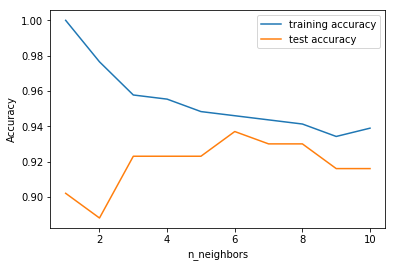

In [3]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# データセットの生成
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

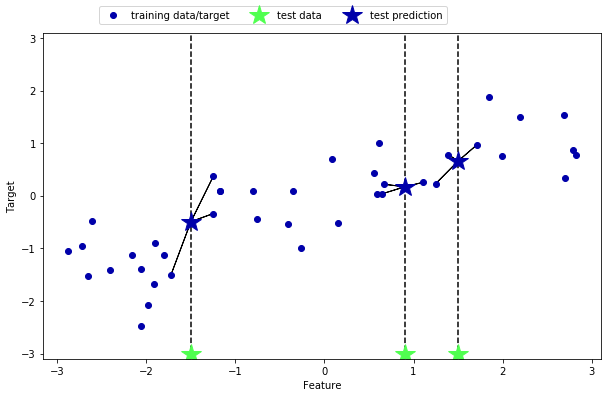

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

# wave データセット
X,y = mglearn.datasets.make_wave(n_samples=40)

# wave データセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors = 3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [10]:
# テストセットに対する制度
print(f"Test set predictions：\n{reg.predict(X_test)}")

Test set predictions：
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


# scoreメソッドでモデルを評価
回帰予測器はscoreメソッドに対して、R<sup>2</sup>スコアを返す。
R<sup>2</sup>スコアは決定係数(coefficient of determination)と呼ばれる、回帰モデルの予測の正確さを測る指標で、0から1までの値を取る。
1は完全な予測に対応し、0は訓練セットのレスポンス値(y_train)の平均を返すだけのものに対応する。

In [14]:
# テストセットのモデルを評価
print(f"Test set R^2：{reg.score(X_test, y_test):.2f}") # 「:.2f」少数点以下2位まで表示

Test set R^2：0.83


# KNeighborsRegressorの解析

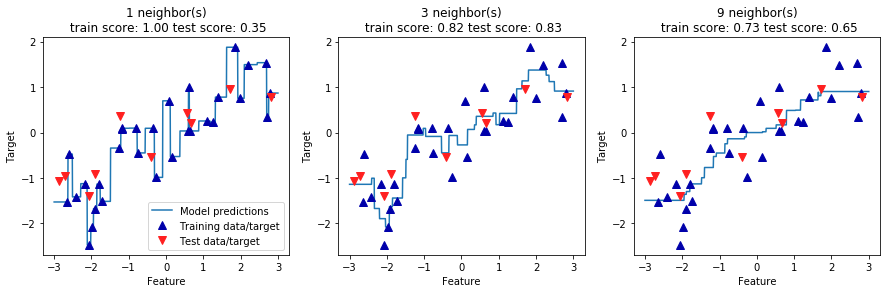

In [17]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# -3から3までの間に1000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    # グラフ描画
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    ax.set_title(
        f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")